In [2]:
# import libraries we need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

pip install openpyxl


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# read the excel file
df = pd.read_excel("/Users/shuoqu/Downloads/Group Project Data-SFD Data-Toronto Police.xlsx")

In [5]:
# see the description of the data
df.describe(include='all')

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
count,5707.000000,5707.000000,5707.000000,5707,5707,5707.000000,5707,5707,5707.000000,5707.000000,...,5707,5707,5707.000000,5707.000000,5707.0,5707,5707.0,5707,5707.000000,5707.000000
unique,NaN,NaN,NaN,5707,3579,NaN,12,7,NaN,NaN,...,4,17,NaN,NaN,159.0,159,140.0,140,NaN,NaN
top,NaN,NaN,NaN,GO-2004397105,2019/08/05 04:00:00+00,NaN,August,Sunday,NaN,NaN,...,Evening,D31,NaN,NaN,25.0,Glenfield-Jane Heights,25.0,Glenfield-Jane Heights (25),NaN,NaN
freq,NaN,NaN,NaN,1,9,NaN,604,995,NaN,NaN,...,2307,998,NaN,NaN,311.0,311,304.0,304,NaN,NaN
mean,-79.481115,43.244138,2854.000000,NaN,NaN,2014.460662,NaN,NaN,187.198178,15.901174,...,NaN,NaN,0.122481,0.488172,NaN,NaN,NaN,NaN,-79.481115,43.244138
std,0.640212,4.532671,1647.613324,NaN,NaN,5.468803,NaN,NaN,100.269326,8.819631,...,NaN,NaN,0.349599,0.779148,NaN,NaN,NaN,NaN,0.640212,4.532671
min,-85.488744,0.000000,1.000000,NaN,NaN,2004.000000,NaN,NaN,1.000000,1.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-85.488744,0.000000
25%,-79.513346,43.676604,1427.500000,NaN,NaN,2010.000000,NaN,NaN,106.000000,8.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.513346,43.676604
50%,-79.439740,43.720796,2854.000000,NaN,NaN,2016.000000,NaN,NaN,192.000000,16.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.439740,43.720796
75%,-79.328082,43.755306,4280.500000,NaN,NaN,2019.000000,NaN,NaN,268.000000,23.000000,...,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,-79.328082,43.755306


In [6]:
# drop all the rows with missing values
df_clean = df.drop(df[df['HOOD_158']== "NSA"].index)

# reset all the index
df_clean.reset_index(drop=True, inplace=True)

# show df info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5643 non-null   float64
 1   Y                  5643 non-null   float64
 2   OBJECTID           5643 non-null   int64  
 3   EVENT_UNIQUE_ID    5643 non-null   object 
 4   OCC_DATE           5643 non-null   object 
 5   OCC_YEAR           5643 non-null   int64  
 6   OCC_MONTH          5643 non-null   object 
 7   OCC_DOW            5643 non-null   object 
 8   OCC_DOY            5643 non-null   int64  
 9   OCC_DAY            5643 non-null   int64  
 10  OCC_HOUR           5643 non-null   int64  
 11  OCC_TIME_RANGE     5643 non-null   object 
 12  DIVISION           5643 non-null   object 
 13  DEATH              5643 non-null   int64  
 14  INJURIES           5643 non-null   int64  
 15  HOOD_158           5643 non-null   object 
 16  NEIGHBOURHOOD_158  5643 

In [7]:
# drop duplicated rows
df_clean.drop_duplicates()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5639,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5640,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5641,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


In [8]:
# drop columns 
df_clean = df_clean.drop(['X','Y','OBJECTID','EVENT_UNIQUE_ID','LONG_WGS84','LAT_WGS84','HOOD_140','NEIGHBOURHOOD_140'],axis =1)

In [9]:
# combine death and injuries column
df_clean['Death and Injuries'] = df_clean['DEATH'] + df_clean['INJURIES']
df_clean

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,Death and Injuries
0,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,0
1,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,0
2,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,2
3,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,1
4,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,1
5639,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,2
5640,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,0
5641,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove,2


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   OCC_DATE            5643 non-null   object
 1   OCC_YEAR            5643 non-null   int64 
 2   OCC_MONTH           5643 non-null   object
 3   OCC_DOW             5643 non-null   object
 4   OCC_DOY             5643 non-null   int64 
 5   OCC_DAY             5643 non-null   int64 
 6   OCC_HOUR            5643 non-null   int64 
 7   OCC_TIME_RANGE      5643 non-null   object
 8   DIVISION            5643 non-null   object
 9   DEATH               5643 non-null   int64 
 10  INJURIES            5643 non-null   int64 
 11  HOOD_158            5643 non-null   object
 12  NEIGHBOURHOOD_158   5643 non-null   object
 13  Death and Injuries  5643 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 617.3+ KB


<Axes: >

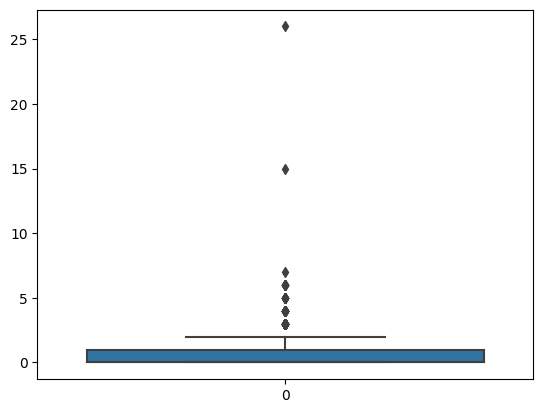

In [11]:
# show the distribution of the 'Death and Injuries' column
sns.boxplot(data=df_clean['Death and Injuries'])


In [12]:
from statsmodels.formula.api import ols


<Axes: xlabel='OCC_TIME_RANGE', ylabel='Death and Injuries'>

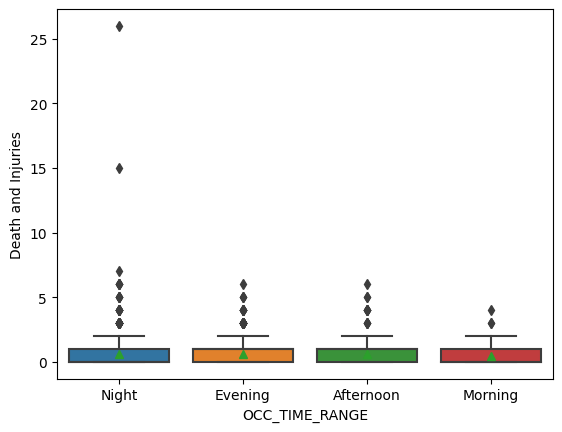

In [13]:
sns.boxplot(x="OCC_TIME_RANGE",
y="Death and Injuries",
data=df_clean,
showmeans=True)

In [14]:
value_counts_df = df_clean['OCC_MONTH'].value_counts().reset_index()

# Rename the columns
value_counts_df.columns = ['OCC_MONTH', 'Count']

# Display the DataFrame
print(value_counts_df)

    OCC_MONTH  Count
0      August    599
1        July    579
2   September    530
3         May    514
4        June    482
5     October    479
6     January    436
7       April    433
8    November    424
9       March    422
10   December    407
11   February    338


In [15]:
print(type(value_counts_df))

<class 'pandas.core.frame.DataFrame'>


In [16]:
df_clean.head()

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,Death and Injuries
0,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,0
1,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,0
2,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,2
3,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,1
4,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,0


In [17]:
df_clean.drop(columns= 'OCC_DATE', inplace=True)

In [18]:
df_clean


,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,Death and Injuries
0,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,0
1,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,0
2,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,2
3,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,1
4,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,2022,June,Thursday,153,2,3,Night,D33,0,1,53,Henry Farm,1
5639,2022,July,Sunday,198,17,3,Night,D14,1,1,164,Wellington Place,2
5640,2022,February,Monday,52,21,5,Night,D43,0,0,135,Morningside,0
5641,2022,September,Sunday,254,11,1,Night,D11,0,2,83,Dufferin Grove,2


In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   OCC_YEAR            5643 non-null   int64 
 1   OCC_MONTH           5643 non-null   object
 2   OCC_DOW             5643 non-null   object
 3   OCC_DOY             5643 non-null   int64 
 4   OCC_DAY             5643 non-null   int64 
 5   OCC_HOUR            5643 non-null   int64 
 6   OCC_TIME_RANGE      5643 non-null   object
 7   DIVISION            5643 non-null   object
 8   DEATH               5643 non-null   int64 
 9   INJURIES            5643 non-null   int64 
 10  HOOD_158            5643 non-null   object
 11  NEIGHBOURHOOD_158   5643 non-null   object
 12  Death and Injuries  5643 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 573.2+ KB


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [21]:
df_clean['OCC_TIME_RANGE'].unique()

array(['Night', 'Evening', 'Afternoon', 'Morning'], dtype=object)

In [22]:
df_clean.head(10)

,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,Death and Injuries
0,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,0
1,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,0
2,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,2
3,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,1
4,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,0
5,2004,March,Sunday,74,14,0,Night,D33,0,0,150,Fenside-Parkwoods,0
6,2004,January,Monday,19,19,23,Evening,D42,0,0,144,Morningside Heights,0
7,2004,September,Wednesday,252,8,14,Afternoon,D23,0,0,2,Mount Olive-Silverstone-Jamestown,0
8,2004,April,Wednesday,105,14,23,Evening,D14,0,0,85,South Parkdale,0
9,2004,October,Wednesday,301,27,20,Evening,D33,0,1,150,Fenside-Parkwoods,1


In [23]:
# Define custom mappings for OCC_MONTH and OCC_DOW
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
dow_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Encode OCC_MONTH based on custom mapping
df_clean['OCC_MONTH_ENCODED'] = df_clean['OCC_MONTH'].map(month_mapping)

# Encode OCC_DOW based on custom mapping
df_clean['OCC_DOW_ENCODED'] = df_clean['OCC_DOW'].map(dow_mapping)


In [24]:
df_clean.head(10)

,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,Death and Injuries,OCC_MONTH_ENCODED,OCC_DOW_ENCODED
0,2004,May,Saturday,136,15,1,Night,D41,0,0,142,Woburn North,0,5,6
1,2004,July,Monday,208,26,23,Evening,D23,0,0,1,West Humber-Clairville,0,7,1
2,2004,May,Friday,135,14,16,Afternoon,D31,1,1,24,Black Creek,2,5,5
3,2004,December,Sunday,354,19,0,Night,D51,1,0,168,Downtown Yonge East,1,12,7
4,2004,April,Monday,103,12,22,Evening,D42,0,0,146,Malvern East,0,4,1
5,2004,March,Sunday,74,14,0,Night,D33,0,0,150,Fenside-Parkwoods,0,3,7
6,2004,January,Monday,19,19,23,Evening,D42,0,0,144,Morningside Heights,0,1,1
7,2004,September,Wednesday,252,8,14,Afternoon,D23,0,0,2,Mount Olive-Silverstone-Jamestown,0,9,3
8,2004,April,Wednesday,105,14,23,Evening,D14,0,0,85,South Parkdale,0,4,3
9,2004,October,Wednesday,301,27,20,Evening,D33,0,1,150,Fenside-Parkwoods,1,10,3


In [25]:
# Define a mapping dictionary
time_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4}

# Apply the mapping to the 'OCC_TIME_RANGE' column
df_clean['OCC_TIME_RANGE'] = df_clean['OCC_TIME_RANGE'].map(time_mapping)


In [26]:
df_clean.drop(columns = 'NEIGHBOURHOOD_158',inplace=True)

In [27]:
df_clean

,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,Death and Injuries,OCC_MONTH_ENCODED,OCC_DOW_ENCODED
0,2004,May,Saturday,136,15,1,4,D41,0,0,142,0,5,6
1,2004,July,Monday,208,26,23,3,D23,0,0,1,0,7,1
2,2004,May,Friday,135,14,16,2,D31,1,1,24,2,5,5
3,2004,December,Sunday,354,19,0,4,D51,1,0,168,1,12,7
4,2004,April,Monday,103,12,22,3,D42,0,0,146,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5638,2022,June,Thursday,153,2,3,4,D33,0,1,53,1,6,4
5639,2022,July,Sunday,198,17,3,4,D14,1,1,164,2,7,7
5640,2022,February,Monday,52,21,5,4,D43,0,0,135,0,2,1
5641,2022,September,Sunday,254,11,1,4,D11,0,2,83,2,9,7


In [28]:
df_clean.drop('DEATH',axis= 1,inplace=True)
df_clean.drop('INJURIES', axis = 1  ,inplace=True)

df_clean

,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,HOOD_158,Death and Injuries,OCC_MONTH_ENCODED,OCC_DOW_ENCODED
0,2004,May,Saturday,136,15,1,4,D41,142,0,5,6
1,2004,July,Monday,208,26,23,3,D23,1,0,7,1
2,2004,May,Friday,135,14,16,2,D31,24,2,5,5
3,2004,December,Sunday,354,19,0,4,D51,168,1,12,7
4,2004,April,Monday,103,12,22,3,D42,146,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5638,2022,June,Thursday,153,2,3,4,D33,53,1,6,4
5639,2022,July,Sunday,198,17,3,4,D14,164,2,7,7
5640,2022,February,Monday,52,21,5,4,D43,135,0,2,1
5641,2022,September,Sunday,254,11,1,4,D11,83,2,9,7


In [35]:
df_clean = df_clean.drop(['OCC_MONTH','OCC_DOW'],axis =1)

In [36]:
df_clean

,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,HOOD_158,Death and Injuries,OCC_MONTH_ENCODED,OCC_DOW_ENCODED
0,2004,136,15,1,4,D41,142,0,5,6
1,2004,208,26,23,3,D23,1,0,7,1
2,2004,135,14,16,2,D31,24,2,5,5
3,2004,354,19,0,4,D51,168,1,12,7
4,2004,103,12,22,3,D42,146,0,4,1
...,...,...,...,...,...,...,...,...,...,...
5638,2022,153,2,3,4,D33,53,1,6,4
5639,2022,198,17,3,4,D14,164,2,7,7
5640,2022,52,21,5,4,D43,135,0,2,1
5641,2022,254,11,1,4,D11,83,2,9,7


In [40]:
df_clean['DIVISION'] = df_clean['DIVISION'].str.replace('D', '')

In [41]:
df_clean

,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,HOOD_158,Death and Injuries,OCC_MONTH_ENCODED,OCC_DOW_ENCODED
0,2004,136,15,1,4,41,142,0,5,6
1,2004,208,26,23,3,23,1,0,7,1
2,2004,135,14,16,2,31,24,2,5,5
3,2004,354,19,0,4,51,168,1,12,7
4,2004,103,12,22,3,42,146,0,4,1
...,...,...,...,...,...,...,...,...,...,...
5638,2022,153,2,3,4,33,53,1,6,4
5639,2022,198,17,3,4,14,164,2,7,7
5640,2022,52,21,5,4,43,135,0,2,1
5641,2022,254,11,1,4,11,83,2,9,7


In [42]:
y = df_clean["Death and Injuries"]

In [43]:
X = df_clean.drop(columns= 'Death and Injuries')



In [45]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

clf = DecisionTreeClassifier(max_depth=4,criterion = "entropy")
clf = clf.fit(X_train,y_train)

In [46]:

importances = clf.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.5889215  0.2047735  0.01477933 0.05342513 0.02034652 0.11775402
 0.         0.         0.        ]


In [47]:
from sklearn.metrics import accuracy_score

In [48]:
y_pred = clf.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.5877141169521559


In [50]:
# Find the most significant feature
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})
most_significant_feature = feature_importance_df.loc[feature_importance_df['Importance'].idxmax()]['Feature']

print(f"Most Significant Feature: {most_significant_feature}")

Most Significant Feature: OCC_YEAR


In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

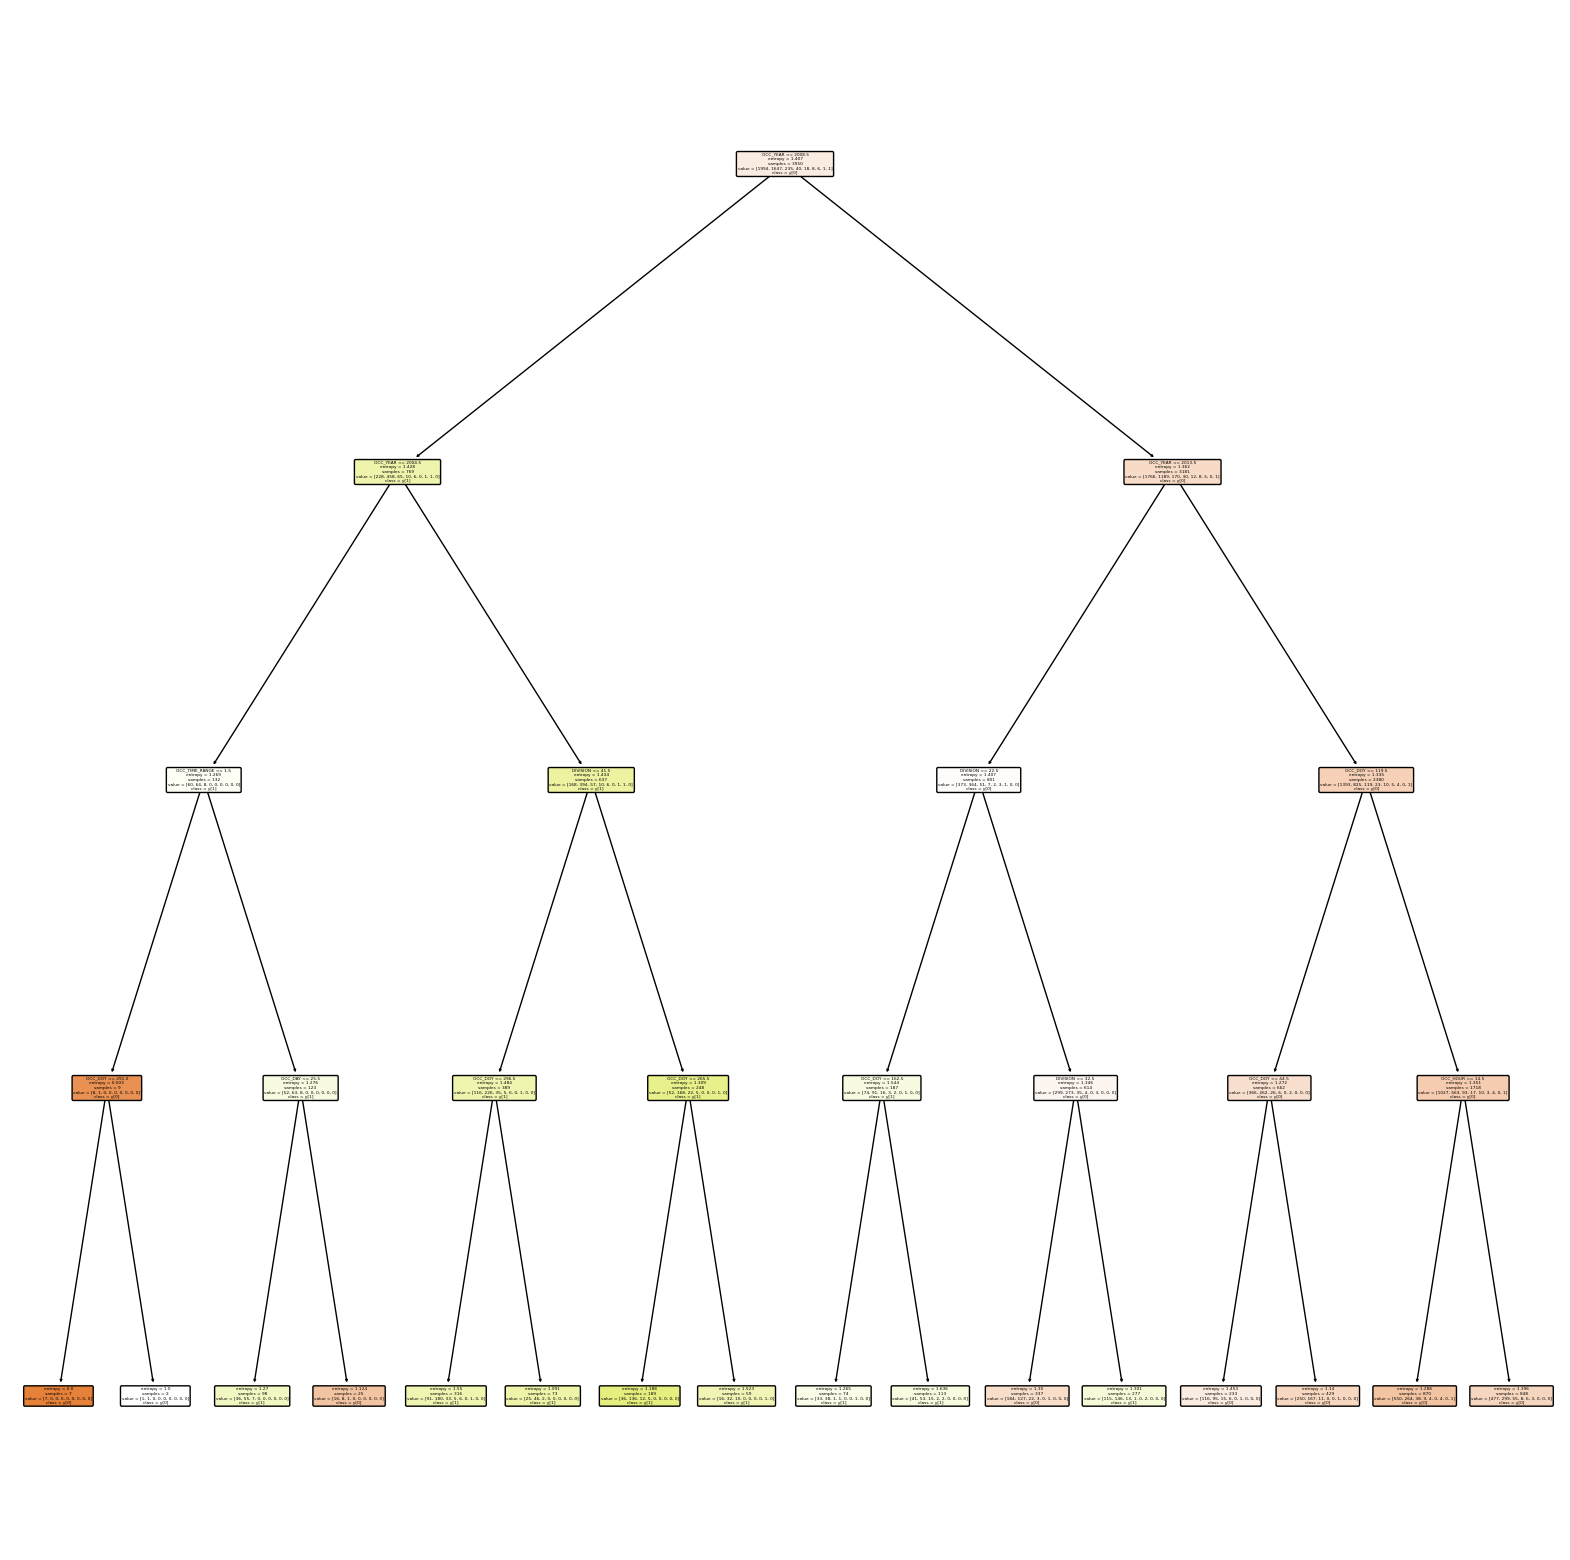

In [52]:

# Setting the figure size
plt.figure(figsize=(20, 20))

# Plot the decision tree
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)

plt.show()

In [53]:
# For the 'DIVISION' column
most_cases_division = df_clean['DIVISION'].value_counts().idxmax()
print(f"Most cases occur in division: {most_cases_division}")

# For the 'HOOD_158' column
most_cases_hood = df_clean['HOOD_158'].value_counts().idxmax()
print(f"Most cases occur in neighbourhood: {most_cases_hood}")

# For the 'OCC_HOUR' column (time of day)
most_cases_hour = df_clean['OCC_HOUR'].value_counts().idxmax()
print(f"Most cases occur at hour: {most_cases_hour}")

# For the 'OCC_MOCC_MONTH_ENCODEDONTH' column (time of year)
most_cases_month = df_clean['OCC_MONTH_ENCODED'].value_counts().idxmax()
print(f"Most cases occur in month: {most_cases_month}")

Most cases occur in division: 31
Most cases occur in neighbourhood: 25
Most cases occur at hour: 0
Most cases occur in month: 8
